### Random-walk sampler of decomposable graphs

This script implements a random walk sampler of decomposable graphs. 

The sampler is feasible for small graph. 


In [365]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import parallelDG.graph.graph as glib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [366]:
def nei_tree_nodes(nodes, tree):
    nei_list = list()
    for n in nodes:
        nei_list= nei_list + list(tree.neighbors(n))
    return nei_list

def first_visit_random_walk(tree):
    visited = list()
    attempted = list()
    initial_clique = np.random.choice(tree.nodes())
    visited.append(initial_clique)
    next_visit = set(nei_tree_nodes(visited, tree)) - (set(visited) | set(attempted))
    while next_visit: 
        new_clq = np.random.choice(list(next_visit))
        if np.random.uniform() <=0.5: 
            visited.append(new_clq)
        else:
            attempted.append(new_clq)
        next_visit = set(nei_tree_nodes(visited, tree)) - (set(visited) | set(attempted))
    return sorted(visited)

def decomposable_graph(n):
    tree = nx.random_tree(n)
    jt = dict()
    for i in range(n):
        jt[i] = first_visit_random_walk(tree)
    return jt

def to_adj(a):
    p = len(a)
    z = np.zeros(p).reshape(1,p)
    eyes = np.eye(p)
    for node, mem in a.items():
        z = np.append(z, eyes[mem].sum(axis=0).reshape(1,p), axis=0)
    z = z[1:]
    A = (np.matmul(z, z.T) > 0 )*1 - eyes
    return nx.from_numpy_matrix(A)

def hash_graph(G):
    return hash(str(G.edges()))

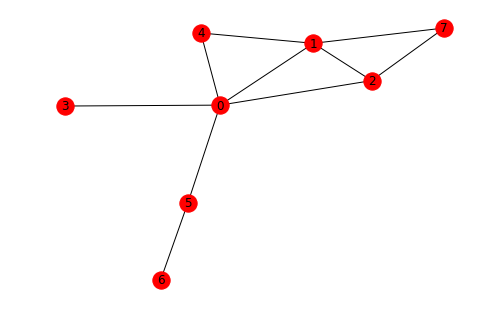

In [374]:
## Sample of single decomposable graph
p = 8
a = decomposable_graph(p) 
nx.draw(to_adj(a), with_labels=True)

In [361]:
## counting the number of decomposable graphs
p = 6
itera = 100000
graph_counts = dict()
for i in range(int(itera)):
    a = decomposable_graph(p) 
    A = to_adj(a)
    b = hash_graph(A)
    if b in graph_counts:
        graph_counts[b] += 1
    else: 
        graph_counts[b] =1

In [362]:
# the correct number of decomposable graphs of size 6 is 821
len(graph_counts)

821

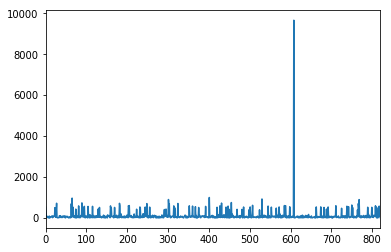

In [364]:
pd.Series(graph_counts.values()).plot()

In [356]:
graph_counts

{-8776499749859131058: 10,
 -8776498749855131061: 5,
 -8766548108881469473: 27,
 -8757706158154761917: 20,
 -8735855400918653703: 1,
 -8719754315980686262: 9,
 -8719752316016686348: 6,
 -8719751316012686351: 5,
 -8457354977410696597: 8,
 -8214863776201319399: 28,
 -8114218204985349390: 27,
 -7386486235351545231: 23,
 -7364962238114774430: 31,
 -6851596282234413018: 26,
 -6794849848383968369: 20,
 -5637687238030946132: 1,
 -5491187457568361761: 8,
 -4898251923367481076: 13,
 -4528952667851565378: 1,
 -4472207234005120550: 20,
 -4472206234001120553: 5,
 -4353052854890936524: 5,
 -4132855459086731427: 4,
 -3813278269426652263: 24,
 -3432952382834119694: 5,
 -3190809687375297130: 21,
 -3021002857277917388: 26,
 -2922204312665582133: 33,
 -2548021530661755738: 29,
 -1456695741351368797: 1,
 -790550347194128059: 4,
 -743330629151979028: 3,
 -743329629147979031: 29,
 -647200732564960553: 23,
 -437714517784127573: 5,
 73168680585538392: 255,
 168533402484521692: 1,
 388676010583086730: 9,
 388